In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
with open('teste2_dados_2000.txt') as f:
    lines = f.readlines()

In [34]:
dados_lst=[]
freqs_lst=[]
for idx,line in enumerate(lines):
    medida = line.split(" DADOS ")
    dados_linha = np.fromstring(medida[1], dtype=int, sep=' ')
    if dados_linha.size==6000:
        dados_lst.append(dados_linha)
        freqs_linha = medida[0].replace("******** ","").split(" -> ")
        freqs_lst.append(np.fromstring(freqs_linha[1], dtype=float, sep=' '))
    else:
        print(medida[0].replace("******** ",""))
        print(dados_linha.shape)

freqs = np.array(freqs_lst)
dados = np.array(dados_lst)

18:47:36.436 -> 1.062964 1961.00 1.067245 1956.00 0.316102 1966.00 0.443640 1956.00 1.063073 1956.00
(600,)
18:47:38.529 -> 1.063705 1953.00 1.067515 1948.00 1.661290 1948.00 1.437573 1948.00 0.998781 1948.00
(600,)
18:47:40.621 -> 1.050374 1958.00 1.052433 1958.00 1.843706 1948.00 2.024267 1948.00 1.915380 1948.00
(600,)
18:47:42.712 -> 1.053801 1958.00 1.055361 1958.00 1.868309 1948.00 1.944879 1948.00 1.742332 1948.00
(600,)
18:47:44.837 -> 1.048047 1958.00 1.050929 1958.00 1.794958 1948.00 2.052218 1948.00 2.024548 1948.00
(600,)
18:47:46.930 -> 1.065515 1941.00 1.070522 1938.00 0.559583 1948.00 0.107882 1947.00 0.687476 1938.00
(600,)
18:47:49.022 -> 1.064674 1945.00 1.069671 1938.00 0.496445 1948.00 0.175377 1947.00 0.747667 1938.00
(600,)
18:47:51.148 -> 1.052401 1948.00 1.055937 1948.00 0.517389 1948.00 1.094095 1938.00 1.593892 1938.00
(600,)
18:47:53.241 -> 1.052259 1948.00 1.055775 1948.00 0.542200 1948.00 1.121452 1938.00 1.645279 1938.00
(600,)
18:47:55.333 -> 1.041429 194

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

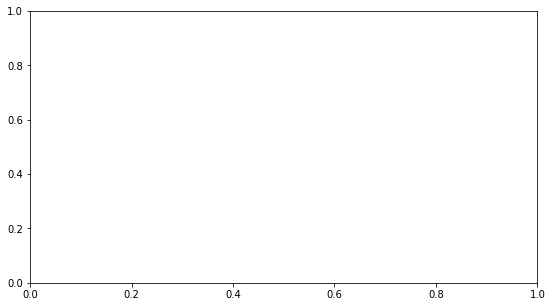

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(freqs[:,0])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs[:,1])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo STM32')
plt.show()


In [38]:
dados.shape

(0,)

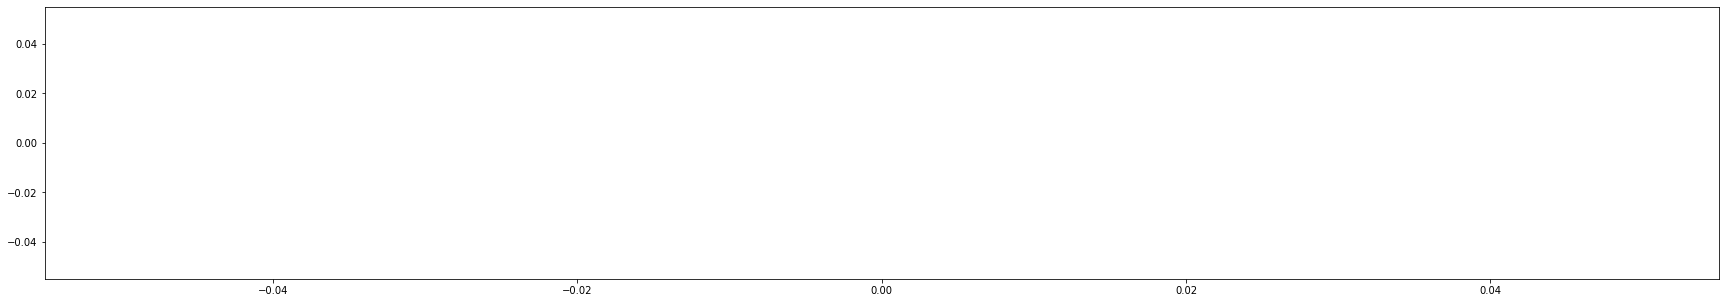

In [47]:
limite=600
k=3.3/4095
plt.figure(figsize=(30,5))
plt.plot(dados[0:limite]*k,'b*')
plt.show()

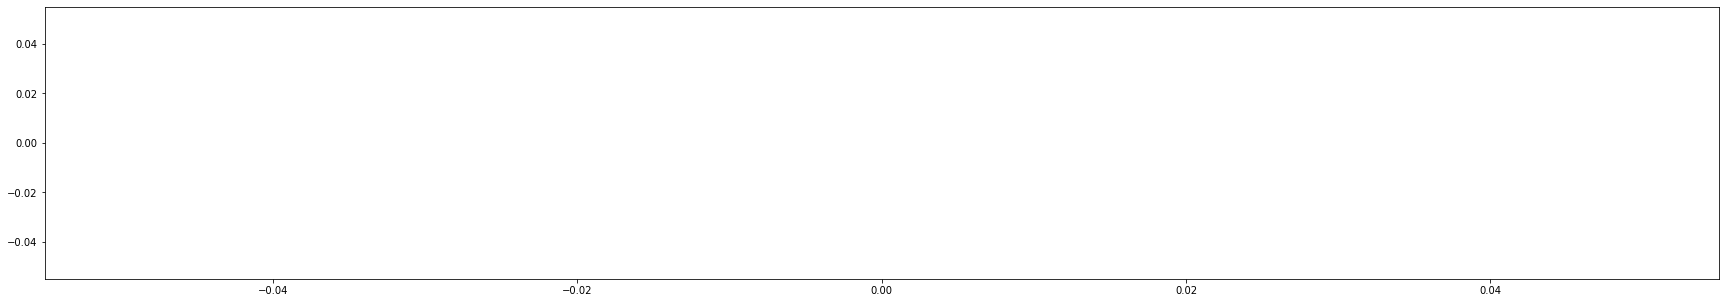

In [49]:
limite=200
k=3.3/4095
plt.figure(figsize=(30,5))
plt.plot(dados[0:limite]*k,'b-')
plt.plot(dados[101:limite]*k,'r-')
plt.show()

In [50]:
# retorna apenas a componente da fft em uma única frequencia, fazendo a conta como se tivesse zeros a mais
def componente_precisa(sinal,frequencia,sample_freq, fator_zeros=100000):
    N = len(sinal)
    Ntotal = N*fator_zeros
    df = sample_freq/Ntotal
    k = np.round(frequencia/df)
    Freal = 0
    Fimag = 0
    for n in range(N):
        Freal += sinal[n]*np.cos(k*n*2*np.pi/Ntotal)
        Fimag += sinal[n]*np.sin(k*n*2*np.pi/Ntotal)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj/(N/2)

In [51]:
# somatorio da fft sem usar complexo, retorna amplitude
def somaa(f,k):
    Freal = 0
    Fimag = 0
    N = len(f)
    for n in range(N):
        Freal += f[n]*np.cos(k*n*2*np.pi/N)
        Fimag += f[n]*np.sin(k*n*2*np.pi/N)
    Fj = np.sqrt(Freal**2 + Fimag**2)
    return Fj

In [52]:
# plota o meu gráfico da fft
def print_fft(sinal,sample_freq, completo = False):
    N = len(sinal)
    df = sample_freq/N
    print(f'df = {df}')
    ffty = np.zeros(N)
    for k in range(N):
        ffty[k] = somaa(sinal,k)
    xf = np.array(range(N))*df
    yf = ffty*2/N
    plt.figure(figsize=(30,5))
    if completo:
        plt.plot(xf,yf,'bx-')
    else:
        plt.plot(xf[0:int((N+1)/2)],yf[0:int((N+1)/2)],'bx-')
    plt.xlabel('Frequencia [Hz]')
    plt.ylabel('Amplitude')
    plt.grid()
    return ffty, df

In [54]:
npontos = 300
ffty, df = print_fft(dados[80,:npontos]*k,600000)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [55]:
npontos = 1500
ffty, df = print_fft(dados[80,:npontos]*k,600000)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [56]:
frequencia = 198180
sample_freq = 600000
npontos_range = range(300,6000,100)
componentes = [componente_precisa(dados[80,:npontos]*k,frequencia,sample_freq, fator_zeros=100000) for npontos in npontos_range]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [57]:
plt.plot(npontos_range,componentes)
plt.xlabel('número de pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

NameError: name 'componentes' is not defined

In [58]:
frequencia = 198180
sample_freq = 600000
npontos = 300
inicio_range = range(0,6000-npontos-1,100)
componentes = [componente_precisa(dados[80,inicio:inicio+npontos]*k,frequencia,sample_freq, fator_zeros=100000) for inicio in inicio_range]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [59]:
plt.plot(inicio_range,componentes)
plt.xlabel(f'posição da janela de {npontos} pontos')
plt.ylabel(f'Componente em f={frequencia}Hz')

NameError: name 'componentes' is not defined

In [26]:
frequencia_range = range(198000,199000,100)
sample_freq = 600000
npontos = 300
componentes = [componente_precisa(dados[80,:npontos]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [27]:
frequencia_range2 = range(198000,199000,10)
sample_freq = 600000
npontos2 = 6000
componentes2 = [componente_precisa(dados[80,:npontos2]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range2]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [28]:
frequencia_range3 = range(198000,199000,10)
sample_freq = 600000
npontos3 = 1500
componentes3 = [componente_precisa(dados[80,:npontos3]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range3]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [29]:
frequencia_range4 = range(198000,199000,10)
sample_freq = 600000
npontos4 = 600
componentes4 = [componente_precisa(dados[80,:npontos4]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range4]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [30]:
plt.figure(figsize=(30,5))
plt.plot(frequencia_range,componentes,'bx-',label=f'{npontos} pontos')
plt.plot(frequencia_range4,componentes4,'mx-',label=f'{npontos4} pontos')
plt.plot(frequencia_range3,componentes3,'gx-',label=f'{npontos3} pontos')
plt.plot(frequencia_range2,componentes2,'rx-',label=f'{npontos2} pontos')
plt.xlabel(f'Amplitude')
plt.ylabel(f'Frequencia [Hz]')
plt.legend()
plt.grid()

NameError: name 'componentes' is not defined

<Figure size 2160x360 with 0 Axes>

In [53]:
dados.shape[0]

122

In [67]:
frequencia = 198190
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=25
nframes=dados.shape[0]
x = range(dados.shape[0])
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-50,frequencia+60,10)
    sample_freq = 600000
    npontos2 = 6000
    componentes2 = [componente_precisa(dados[frame,:npontos2]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    frequencia = frequencia_range2[np.argmax(componentes2)]
    freqs10[idx] = frequencia

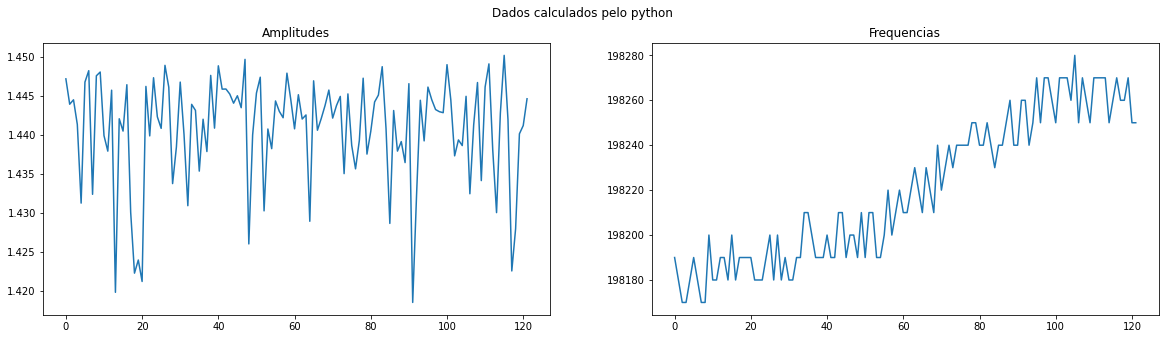

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python')
plt.show()

In [73]:
frequencia = 198190
amplitudes=np.zeros(dados.shape[0])
freqs=np.zeros(dados.shape[0])
nframes=25
nframes=dados.shape[0]
x = range(dados.shape[0])
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-50,frequencia+60,10)
    sample_freq = 600000
    npontos2 = 6000
    componentes2 = [componente_precisa(dados[frame,:npontos2]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range2]
    #amplitudes[idx] = np.max(componentes2)
    frequencia = frequencia_range2[np.argmax(componentes2)]
    frequencia_range3 = range(frequencia-10,frequencia+11,1)
    componentes3 = [componente_precisa(dados[frame,:npontos2]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range3]
    amplitudes[idx] = np.max(componentes3)
    frequencia = frequencia_range3[np.argmax(componentes3)]
    freqs[idx] = frequencia

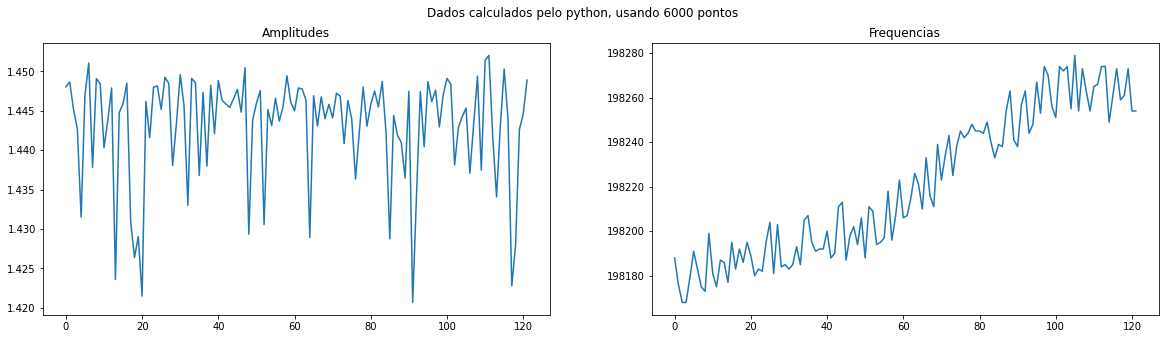

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes[:nframes])
plt.title('Amplitudes')
plt.subplot(1,2,2)
plt.plot(freqs[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.suptitle('Dados calculados pelo python, usando 6000 pontos')
plt.show()

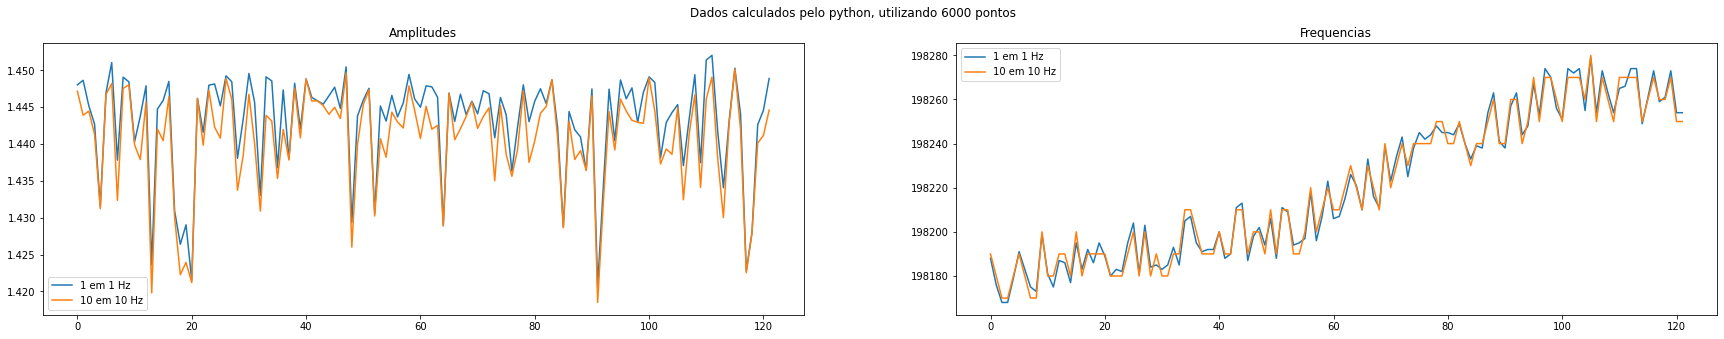

In [85]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
plt.plot(amplitudes[:nframes],label="1 em 1 Hz")
plt.plot(amplitudes10[:nframes],label="10 em 10 Hz")
plt.title('Amplitudes')
plt.legend()
plt.subplot(1,2,2)
plt.plot(freqs[:nframes],label="1 em 1 Hz")
plt.plot(freqs10[:nframes],label="10 em 10 Hz")
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.legend()
plt.suptitle('Dados calculados pelo python, utilizando 6000 pontos')
plt.show()

In [86]:
frequencia = 198190
amplitudes10=np.zeros(dados.shape[0])
freqs10=np.zeros(dados.shape[0])
nframes=25
nframes=dados.shape[0]
x = range(dados.shape[0])
for idx,frame in enumerate(range(nframes)):
    frequencia_range2 = range(frequencia-50,frequencia+60,10)
    sample_freq = 600000
    npontos2 = 600
    componentes2 = [componente_precisa(dados[frame,:npontos2]*k,frequencia_i,sample_freq, fator_zeros=100000) for frequencia_i in frequencia_range2]
    amplitudes10[idx] = np.max(componentes2)
    frequencia = frequencia_range2[np.argmax(componentes2)]
    freqs10[idx] = frequencia
    

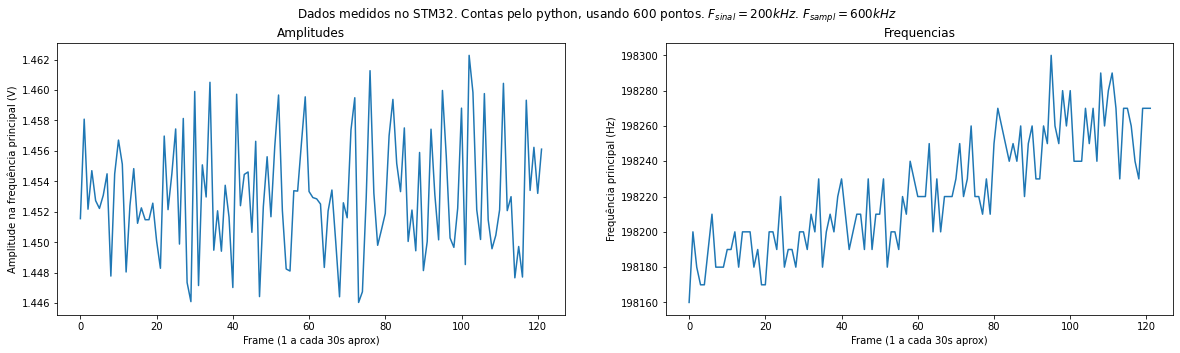

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(amplitudes10[:nframes])
plt.title('Amplitudes')
plt.xlabel('Frame (1 a cada 30s aprox)')
plt.ylabel('Amplitude na frequência principal (V)')
plt.subplot(1,2,2)
plt.plot(freqs10[:nframes])
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)
plt.title('Frequencias')
plt.xlabel('Frame (1 a cada 30s aprox)')
plt.ylabel('Frequência principal (Hz)')
plt.suptitle(r'Dados medidos no STM32. Contas pelo python, usando 600 pontos. $F_{sinal}=200kHz$. $F_{sampl}=600kHz$')
plt.show()